In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import scipy.stats as stats


In [2]:
df = pd.read_csv('C:\\Users\\stoer\\OneDrive\\Desktop\\Machine Learning\\Week 4 - Regression\\Marketing Raw Data.csv')
df.to_csv('Marketdata.csv', index=False)

In [3]:
df = pd.read_csv('Marketdata.csv')
df

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875,No Promo
181,09/05/2021,20.0,61.0,5.0,17.0,2021.0,Sunday,1303.0,3861.0,871.000,No Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocesing

In [4]:
df.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [5]:
df[df['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df

# df.dropna(subset = [''])

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375000,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750000,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19.0,60.0,5.0,17.0,2021.0,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,06/05/2021,19.0,60.0,5.0,17.0,2021.0,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,07/05/2021,19.0,60.0,5.0,17.0,2021.0,Friday,2023.0,4587.0,1450.200000,No Promo
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875000,No Promo


In [7]:
df.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

Explore data

In [8]:
# Important code to analyse the unique elements of each variable
for column in df:
    uniq_vals = np.unique(df[column])
    no_values = len(uniq_vals)
    if no_values < 10:
        print('The number of values for feature {} : {} -- {}'.format(column, no_values, uniq_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, no_values))

The number of values for feature Date : 182
The number of values for feature Week : 28
The number of values for feature Week_ID : 28
The number of values for feature Month : 7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of values for feature Month_ID : 7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of values for feature Year : 2 -- [2020. 2021.]
The number of values for feature Day_Name : 7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors : 175
The number of values for feature Revenue : 181
The number of values for feature Marketing Spend : 182
The number of values for feature Promo : 3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


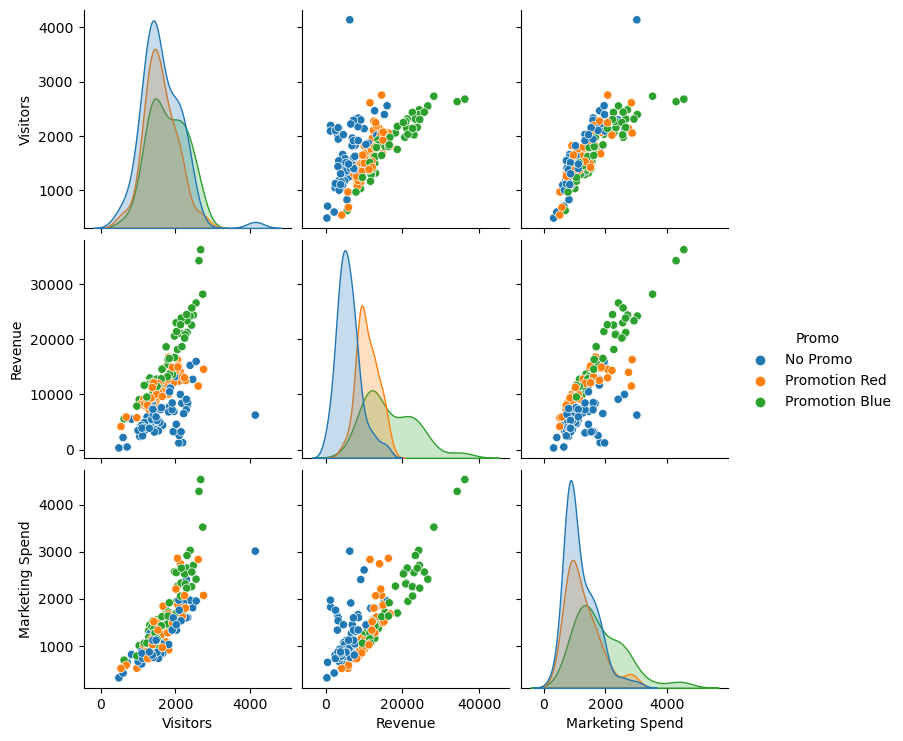

In [9]:
g = sns.pairplot(df[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue= 'Promo')

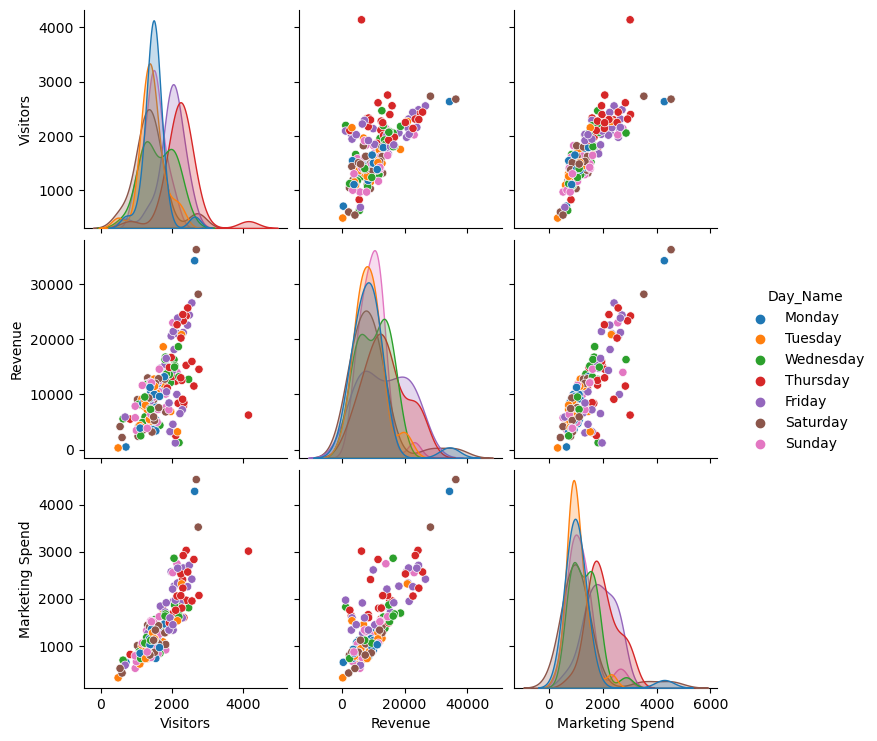

In [10]:
g1 = sns.pairplot(df[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue= 'Day_Name')

By visulisation we see the promotion fro Blue can bring significant revenue.

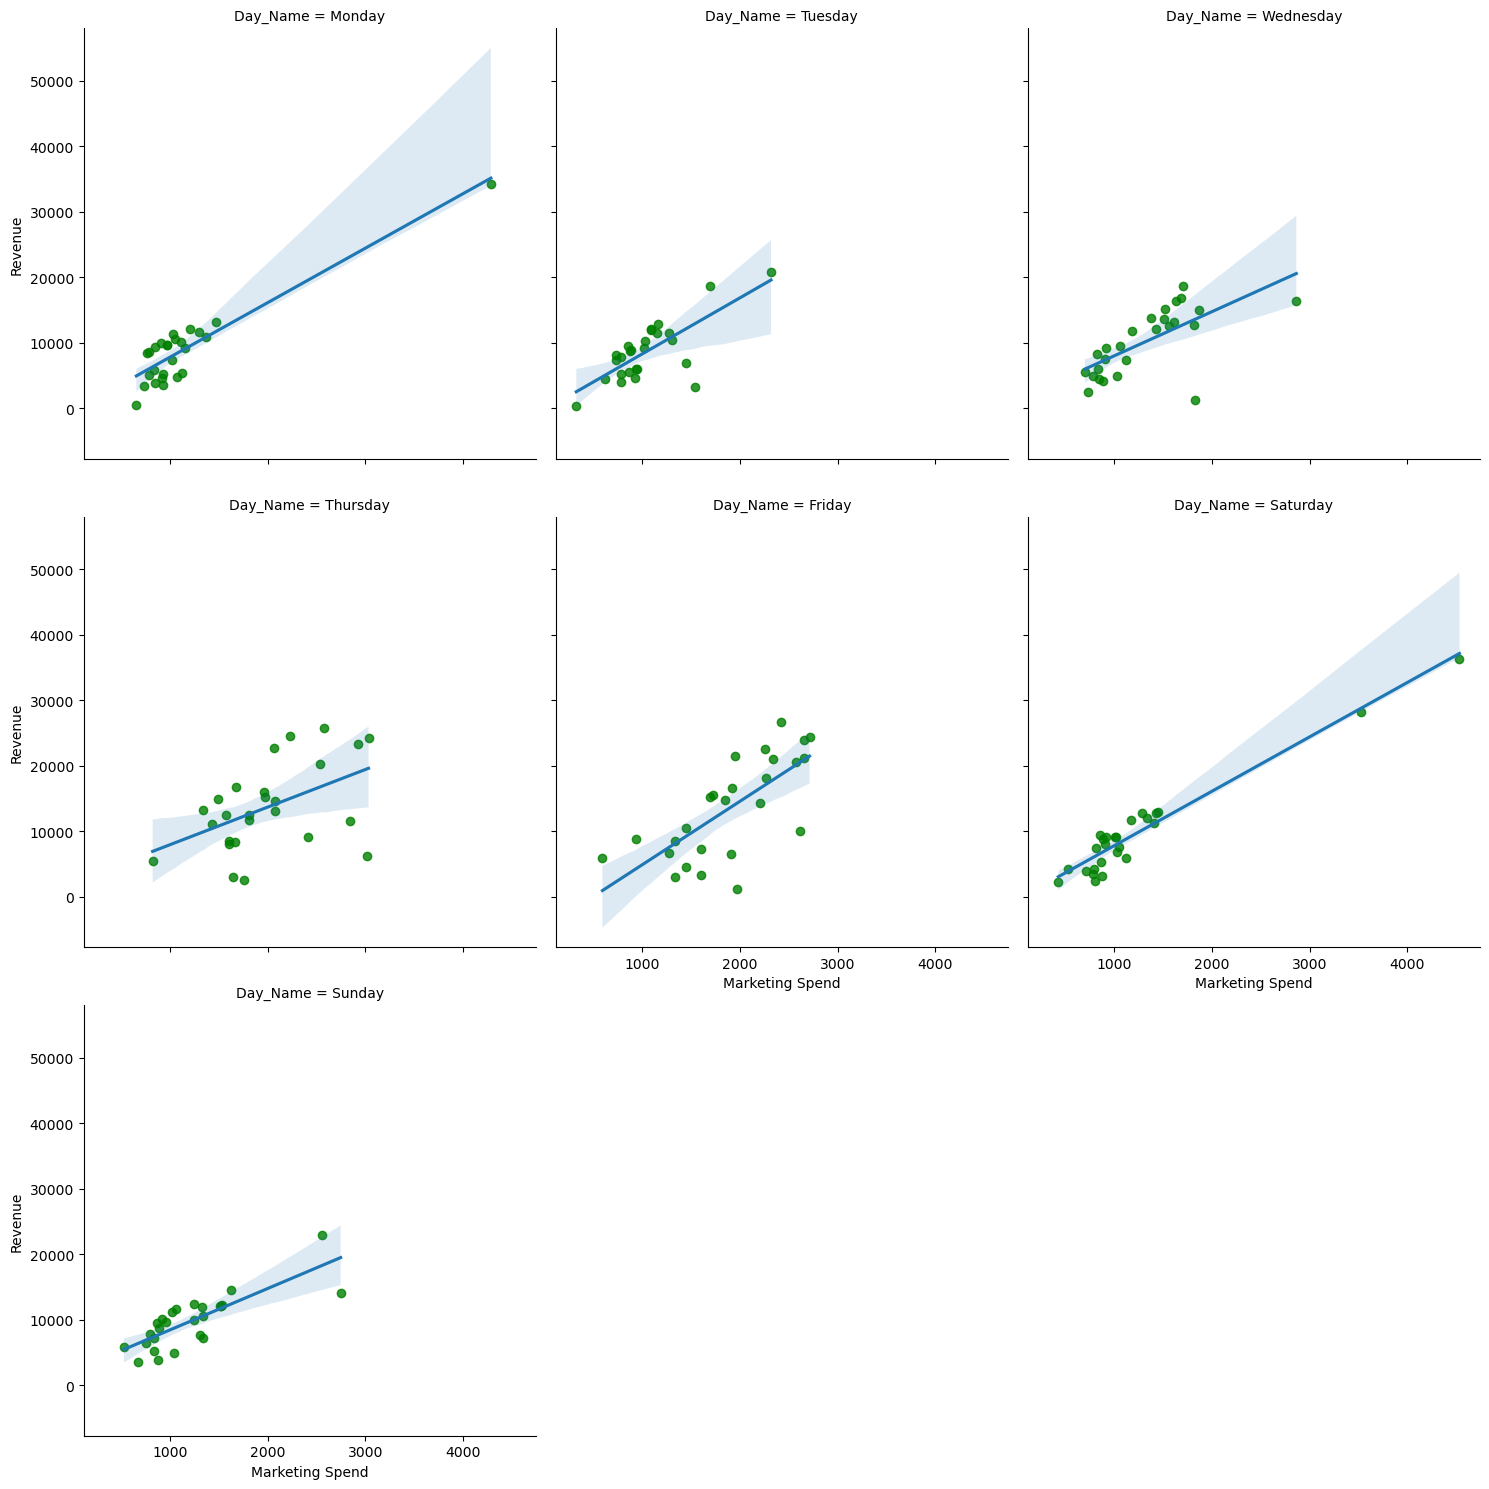

In [11]:
g = sns.lmplot(x= 'Marketing Spend', y = 'Revenue', data = df, col = 'Day_Name', col_wrap = 3,
scatter_kws = {'color': 'green'})

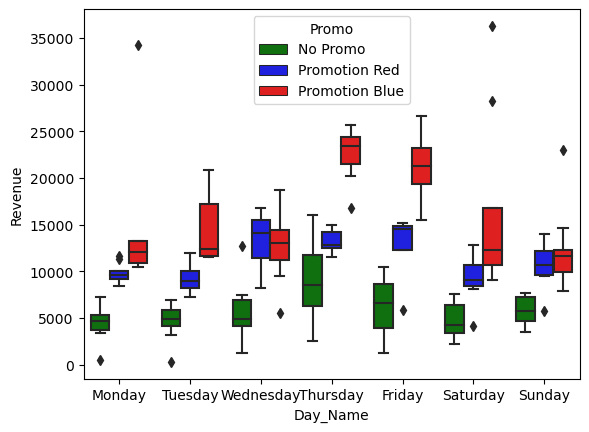

In [12]:
pal = ['green', 'blue', 'red']
g1 = sns.boxplot(x= 'Day_Name', y = 'Revenue', data = df, hue = 'Promo', palette = pal)

In [13]:
# Just demo to show data processing
df = df[df['Revenue'] < 27000]
df.shape

(179, 11)

In [14]:
df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [15]:
df = df[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
df

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375000,No Promo
1,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750000,No Promo
4,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...
177,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,Friday,2023.0,4587.0,1450.200000,No Promo
180,Saturday,1483.0,5927.0,1121.875000,No Promo


In [16]:
# Categorical into numerical

df = pd.get_dummies(df, columns = ['Promo', 'Day_Name'])

df.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


Feature selection

In [17]:
df[['Visitors', 'Marketing Spend', 'Revenue']].corr()

,Visitors,Marketing Spend,Revenue
Visitors,1.000000,0.837313,0.531602
Marketing Spend,0.837313,1.000000,0.725675
Revenue,0.531602,0.725675,1.000000


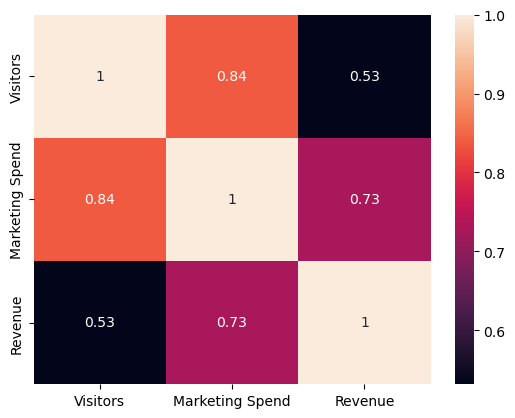

In [18]:
hm = df[['Visitors', 'Marketing Spend', 'Revenue']].corr()
g = sns.heatmap(hm, annot=True)

Feature importance

In [19]:
# Split the data into X and y
X = df.drop('Revenue', axis =1)
y = df['Revenue']

X

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,1121.875000,1,0,0,0,0,1,0,0,0,0


In [20]:
# Run a tree based estimator
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [21]:
for i, column in enumerate(df.drop('Revenue', axis =1)):
    dt.feature_importances_[i]
    fdt = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
    fdt = fdt.sort_values(by='Importance', ascending=False)

print(fdt)

                 Feature  Importance
1        Marketing Spend    0.437724
0               Visitors    0.331539
3   Promo_Promotion Blue    0.047360
4    Promo_Promotion Red    0.044551
2         Promo_No Promo    0.031525
9      Day_Name_Thursday    0.019710
10      Day_Name_Tuesday    0.017344
8        Day_Name_Sunday    0.016428
6        Day_Name_Monday    0.014294
7      Day_Name_Saturday    0.013438
11    Day_Name_Wednesday    0.013288
5        Day_Name_Friday    0.012799


Split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.2, random_state=15)

In [23]:
y_train

73      3021.0
32      6654.0
141     5478.0
154    10027.0
122    25704.0
        ...   
159     5274.0
131     4169.0
121    13201.0
136    11524.0
143    23368.0
Name: Revenue, Length: 143, dtype: float64

Modelling

In [24]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

Evaluate

In [25]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [26]:
# R²
lm.score(X_train, y_train)

0.791949990505602

In [27]:
lm.score(X_test, y_test)

0.7511903865386682

The model explains 79% training data and 75% testing data.

In [28]:
sqrt(mean_squared_error(y_train, y_pred_train))

2618.561282656437

In [29]:
# Root mean squared error
sqrt(mean_squared_error(y_test, y_pred_test))

2340.4200873490104

Standard deviation of residuals, to indicate how spread the error are

In [30]:
mean_absolute_error(y_train, y_pred_train)

1928.0670665528864

In [31]:
# Mean Absolute Error
mean_absolute_error(y_test, y_pred_test)

1692.3835577162279

The average of all the absolute errors


In [32]:
# Coeffocients for all the variables
lm.coef_

array([ 9.72168996e-01,  3.69561477e+00, -4.29587654e+03,  3.72469059e+03,
        5.71185949e+02,  7.38005738e+02, -3.52308895e+02, -9.02241594e+02,
       -1.55867567e+02,  8.14821481e+02,  1.50084913e+02, -2.92494076e+02])

In [33]:
lm.intercept_

4060.6503664996844

Visulisation

C:\Users\stoer\AppData\Local\Temp\ipykernel_3200\170141317.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', c = 'red', lw=3)


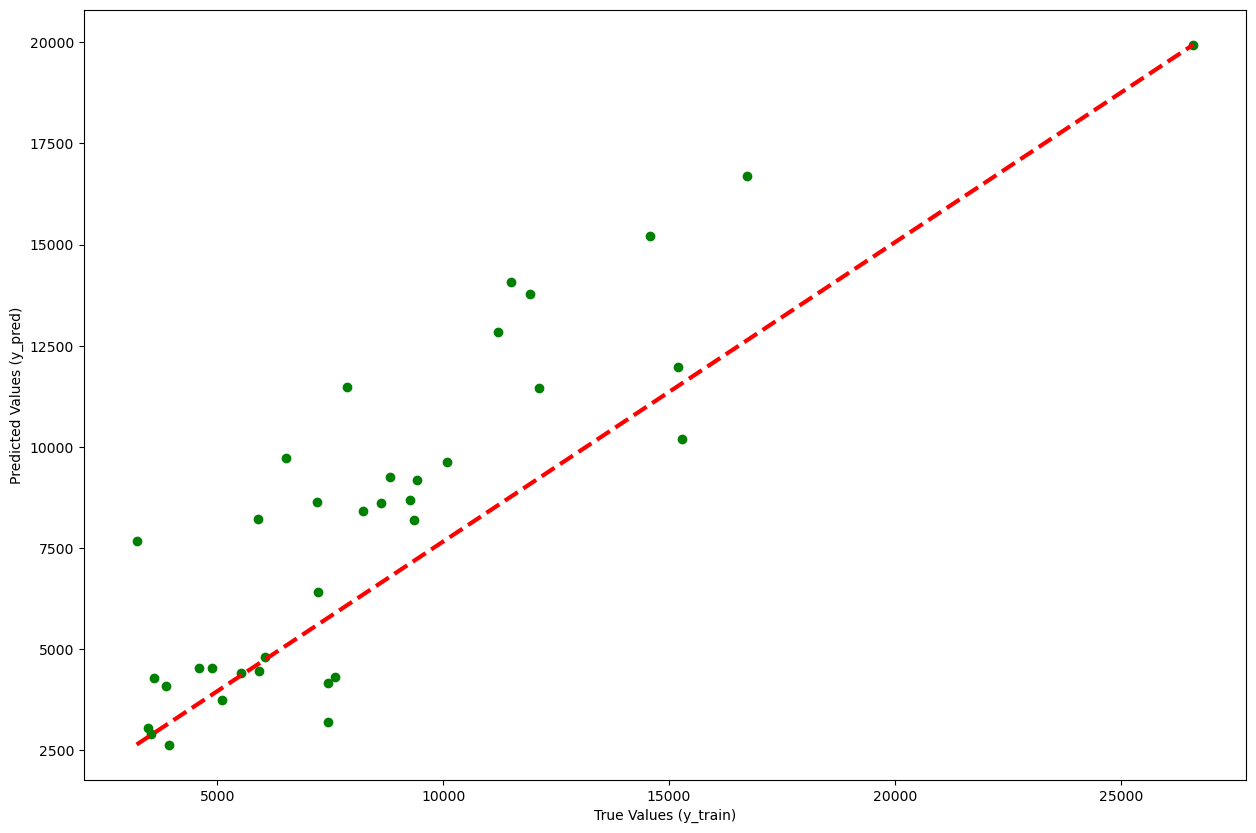

In [34]:
plt.figure(figsize=(15, 10))

plt.scatter(y_test, y_pred_test, color = 'green')
plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', c = 'red', lw=3)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predicted Values (y_pred)')

plt.show()

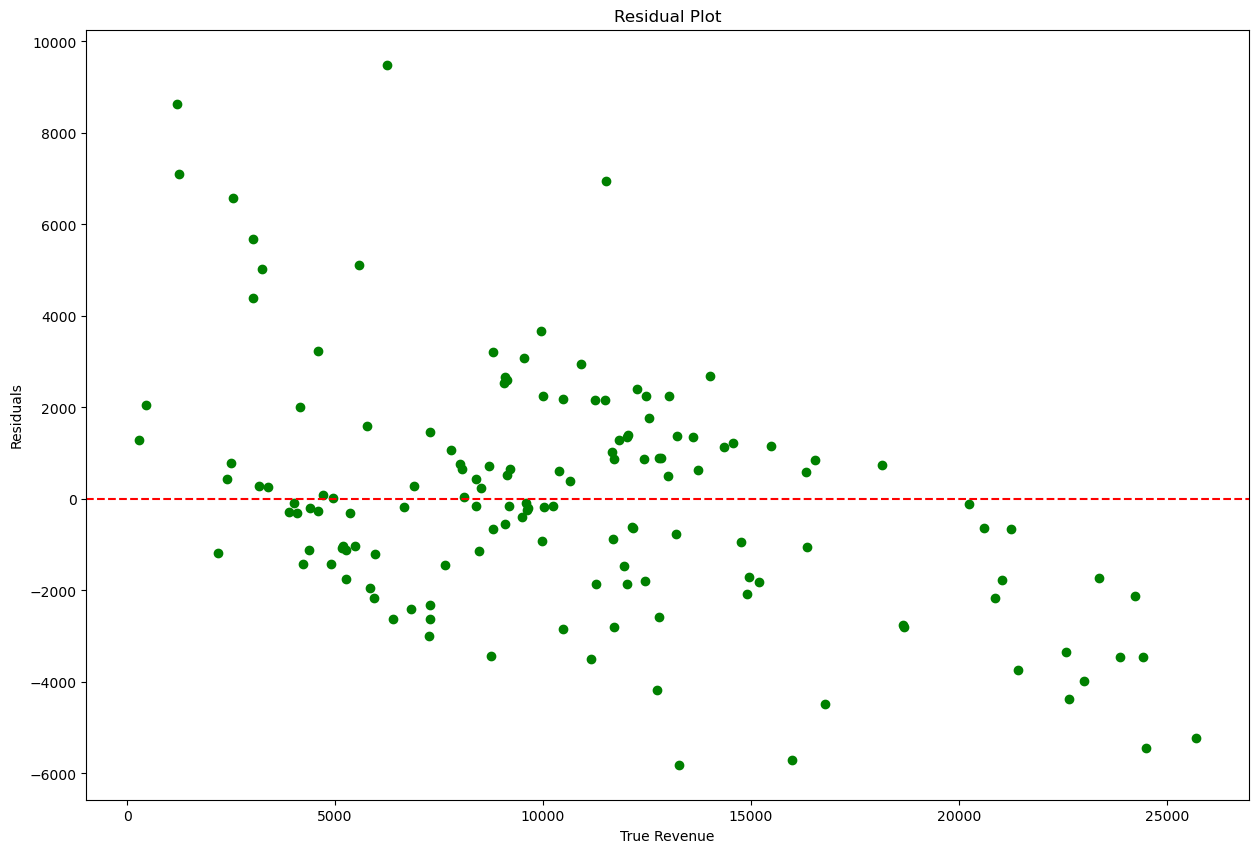

In [35]:
# Calculate residuals (predicted - true values)
residuals1 = y_pred_train - y_train

plt.figure(figsize=(15, 10))

# Create a scatter plot of residuals against true values
plt.scatter(y_train, residuals1, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 (residuals = 0)

plt.xlabel('True Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

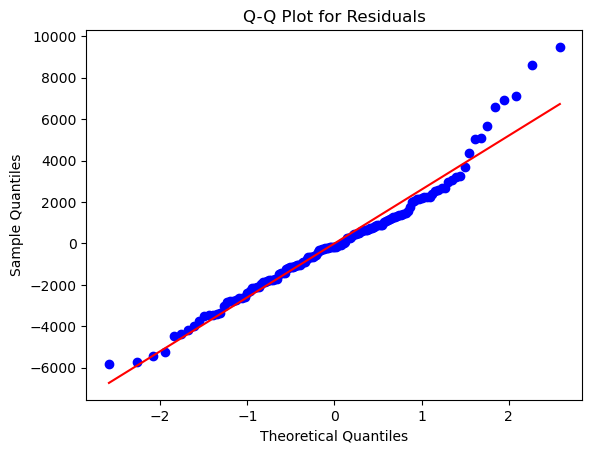

In [36]:
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Checking for Linearity
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(data['AmountCharged'], data['Income'])
plt.xlabel('AmountCharged')
plt.ylabel('Income')
plt.subplot(1,2,2)
plt.scatter(data['AmountCharged'], data['HouseholdSize'])
plt.xlabel('AmountCharged')
plt.ylabel('HouseholdSize')
plt.show()

Check for Multicollinearity
sns.scatterplot(data['Income'],data['HouseholdSize'])

Linear Assumption
Noise Removal
Remove Collinearity
Gaussian Distributions

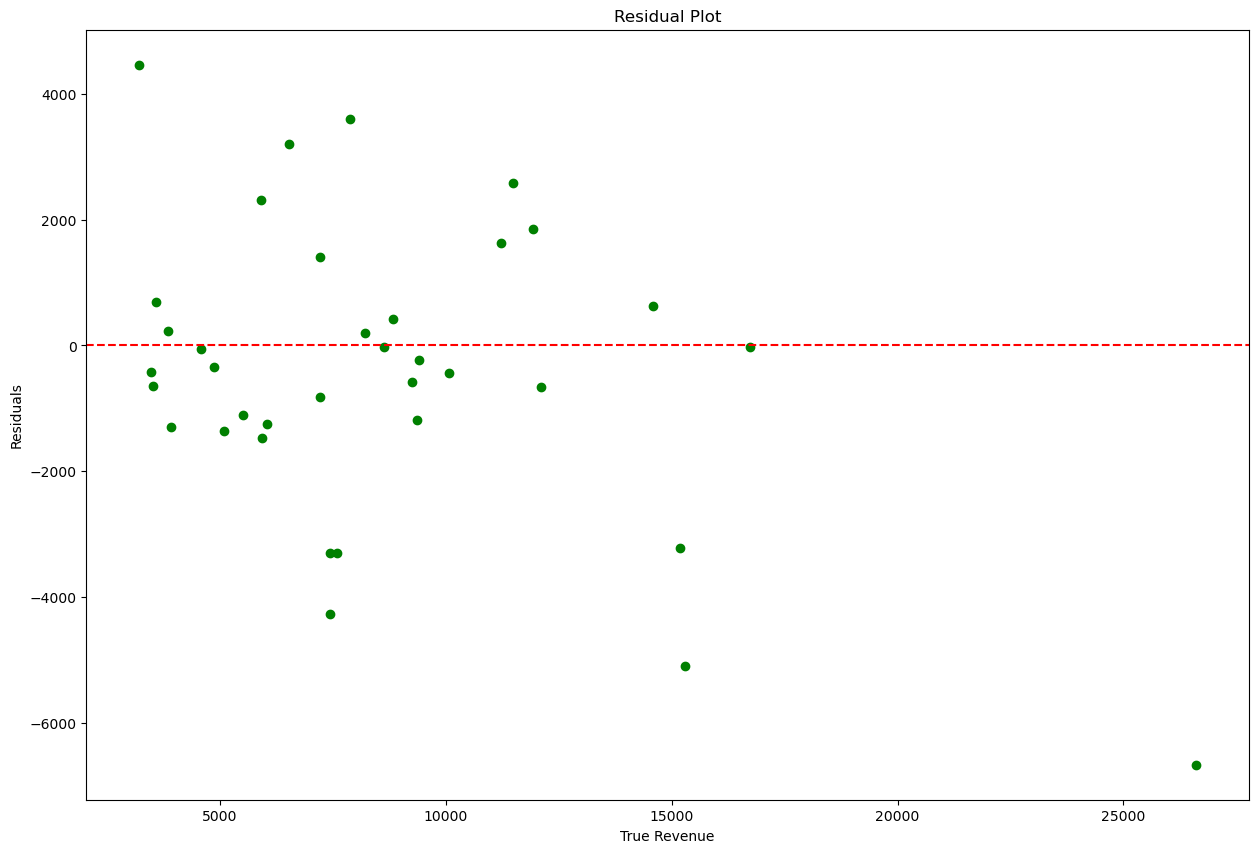

In [37]:
# Calculate residuals (predicted - true values)
residuals2 = y_pred_test- y_test

plt.figure(figsize=(15, 10))

# Create a scatter plot of residuals against true values
plt.scatter(y_test, residuals2, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 (residuals = 0)

plt.xlabel('True Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

Make prediction

In [38]:
# Pass coef into a table

Coeff = lm.coef_
Coeff

array([ 9.72168996e-01,  3.69561477e+00, -4.29587654e+03,  3.72469059e+03,
        5.71185949e+02,  7.38005738e+02, -3.52308895e+02, -9.02241594e+02,
       -1.55867567e+02,  8.14821481e+02,  1.50084913e+02, -2.92494076e+02])